1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.

51
100
105
256


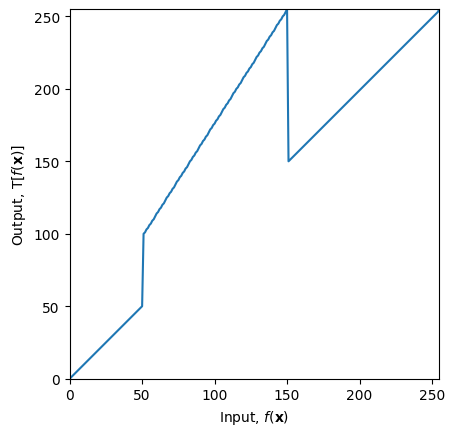

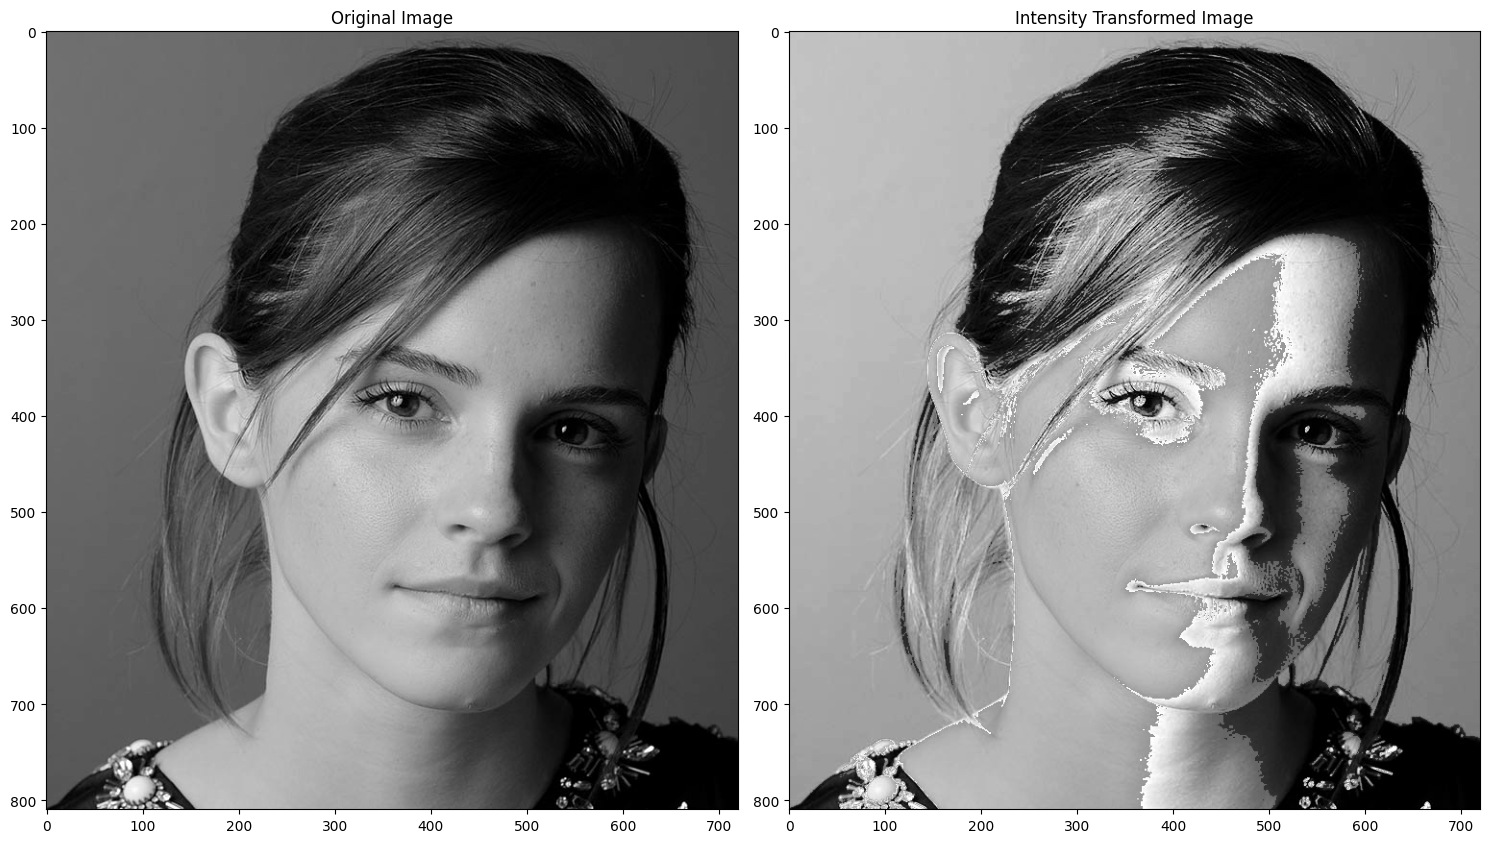

In [15]:
# Intensity Windowing

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 255)])

t1 = np.linspace(0, c[0,1], c[0,1] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,0], c[1,1], c[1,0] - c[0,1]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,0], c[1,1], c[1,1] - c[1,0]).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 

plt.show()


img_orig = cv.imread('../images/emma.jpg', cv.IMREAD_GRAYSCALE)

image_transformed = cv.LUT(img_orig, transform)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Intensity Transformed Image')

plt.tight_layout()
plt.show()

The intensity transformed image enhances the mid range gray parts more than the original image.

2. Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.

(a) white matter

201
55


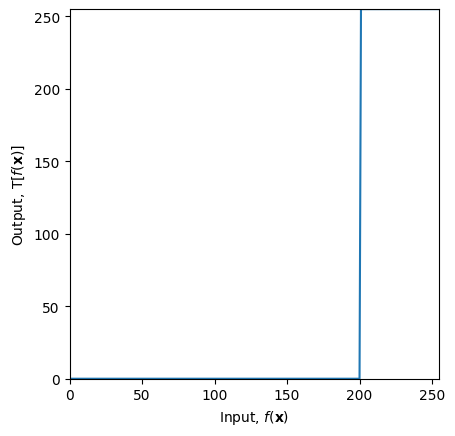

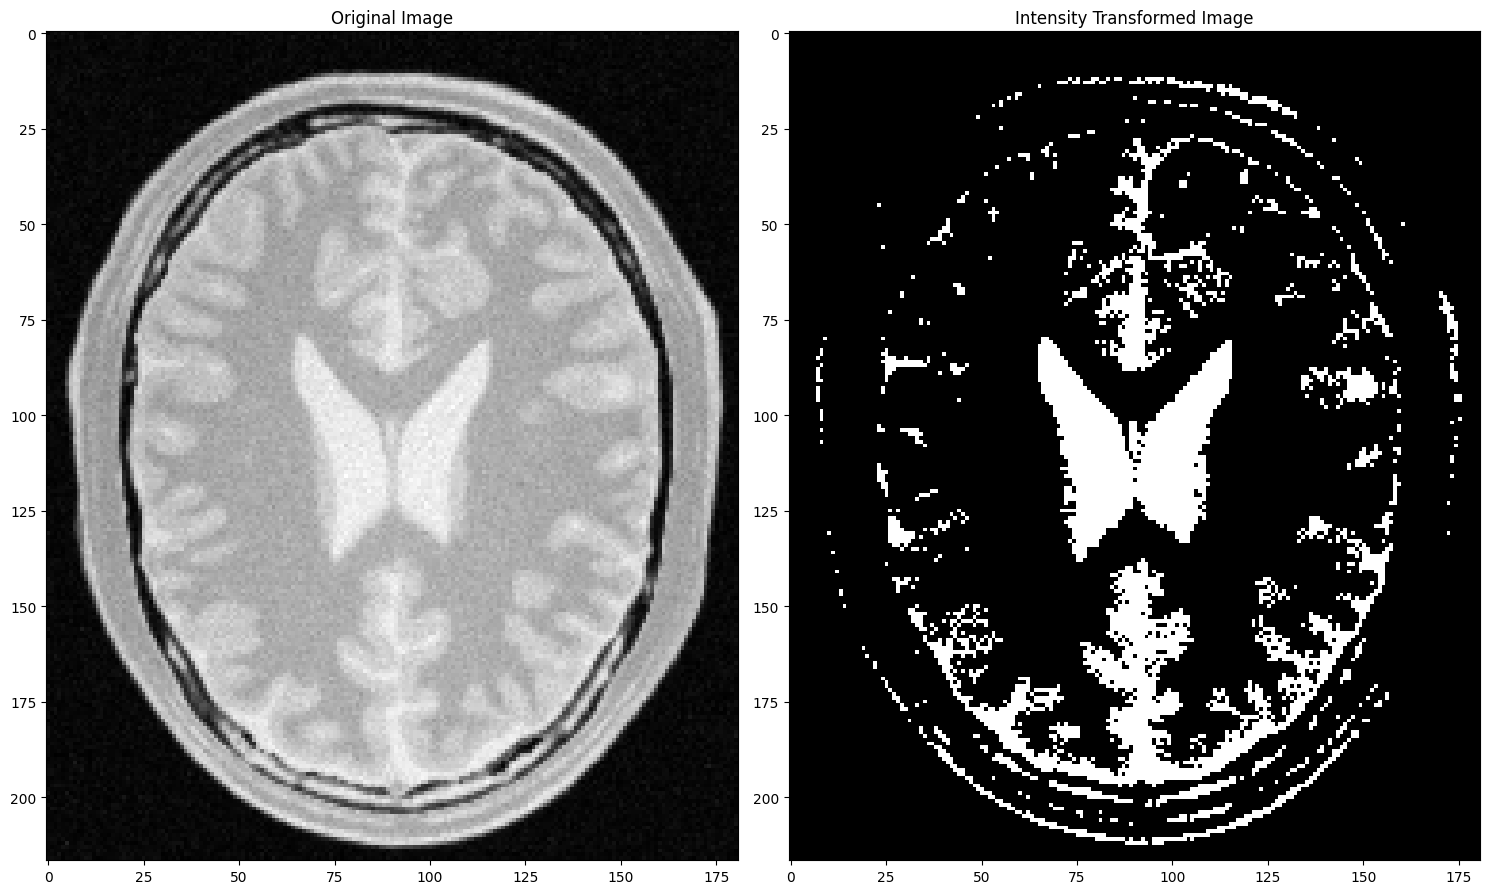

In [16]:
# Intensity Windowing

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(0, 125), (150, 175)])

t1 = np.linspace(0, 0, 201 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(255, 255, 255 - 200).astype('uint8')
print(len(t2))
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 

plt.show()


img_orig = cv.imread('../images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

image_transformed = cv.LUT(img_orig, transform)


# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Intensity Transformed Image')

plt.tight_layout()
plt.show()

(b) gray matter

76
100
80
256


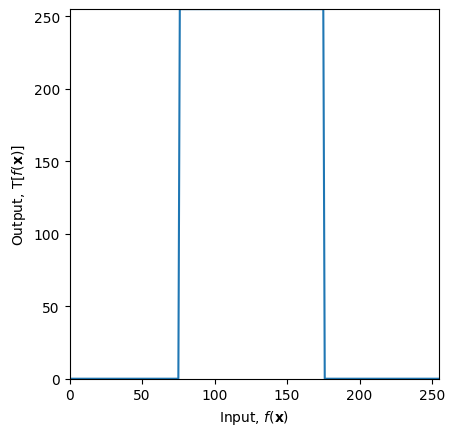

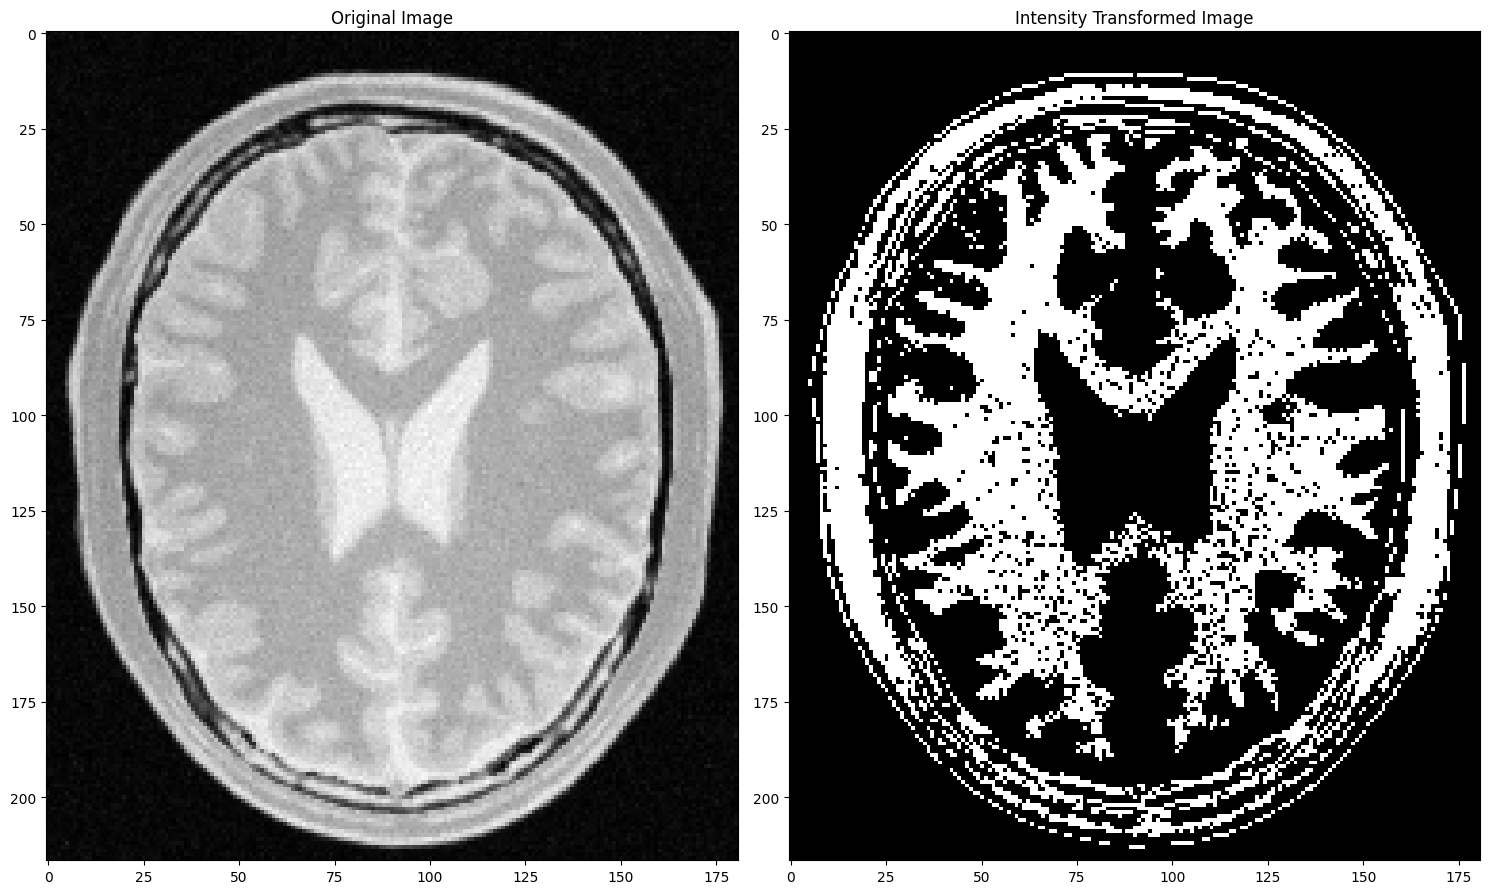

In [17]:
# Intensity Windowing

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 255)])

t1 = np.linspace(0, 0, 75 + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(255, 255, 175 - 75).astype('uint8')
print(len(t2))
t3 = np.linspace(0, 0, 255 - 175).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 

plt.show()


img_orig = cv.imread('../images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

image_transformed = cv.LUT(img_orig, transform)


# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Intensity Transformed Image')

plt.tight_layout()
plt.show()

The first intensity transformed image enhances the brighter regions (white parts) of the brain proton density image, while the second intensity transformed image enhances the mid range gray parts.

3. Consider the image shown in Fig. 3

(a) Apply gamma correction to the L plane in the L*a*b* color space and state the γ value.
(b) Show the histograms of the original and corrected images.

(a) Apply gamma correction to the L plane in the L*a*b* color space and state the γ value.

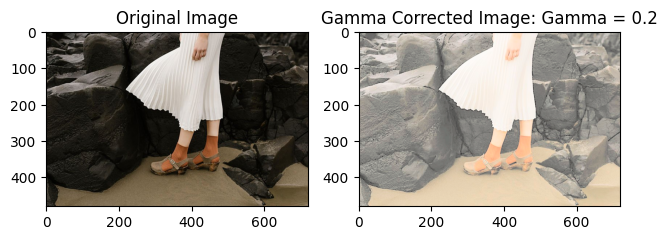

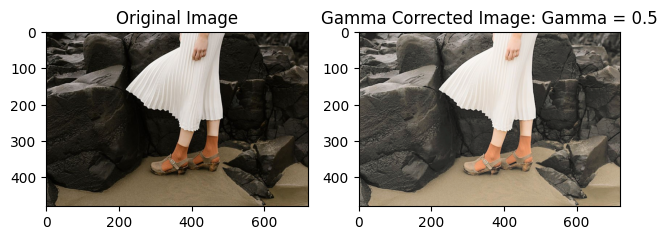

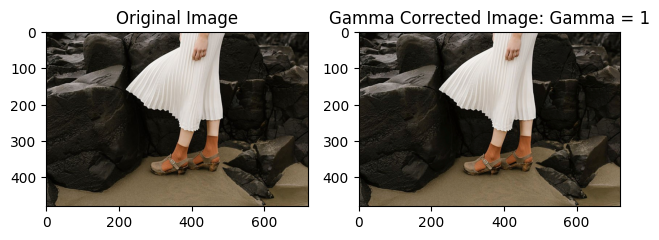

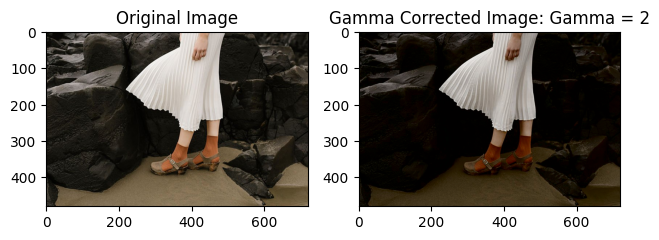

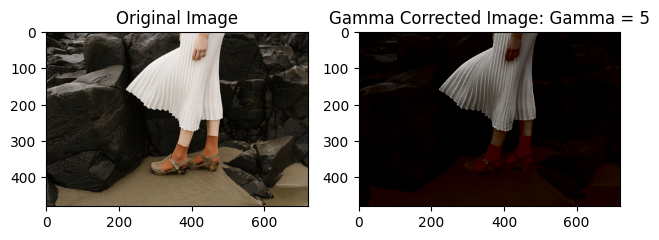

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_orig = cv.imread('../images/highlights_and_shadows.jpg')
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

# Convert the image to LAB color space
img_Lab = cv.cvtColor(img_orig, cv.COLOR_RGB2LAB)

# Split the LAB image into L, a, and b
L_axis, a_axis, b_axis = cv.split(img_Lab)


gamma=0.8
gamma = [0.2, 0.5, 1, 2, 5]
for g in gamma:
    table=np.array([(i/255.0)**(g)*255.0 for i in np.arange(0,256)]).astype('uint8')
    L_gamma=cv.LUT(L_axis,table)
    # Merge the corrected L channel with the original a and b channels
    img_Lab_corrected = cv.merge((L_gamma, a_axis, b_axis))

    img_corrected = cv.cvtColor(img_Lab_corrected, cv.COLOR_LAB2RGB)

    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(img_orig)
    axarr[0].set_title('Original Image')
    axarr[1].imshow(img_corrected)
    axarr[1].set_title('Gamma Corrected Image: Gamma = {}'.format(g))

    plt.tight_layout()
    plt.show()

(b) Show the histograms of the original and corrected images.

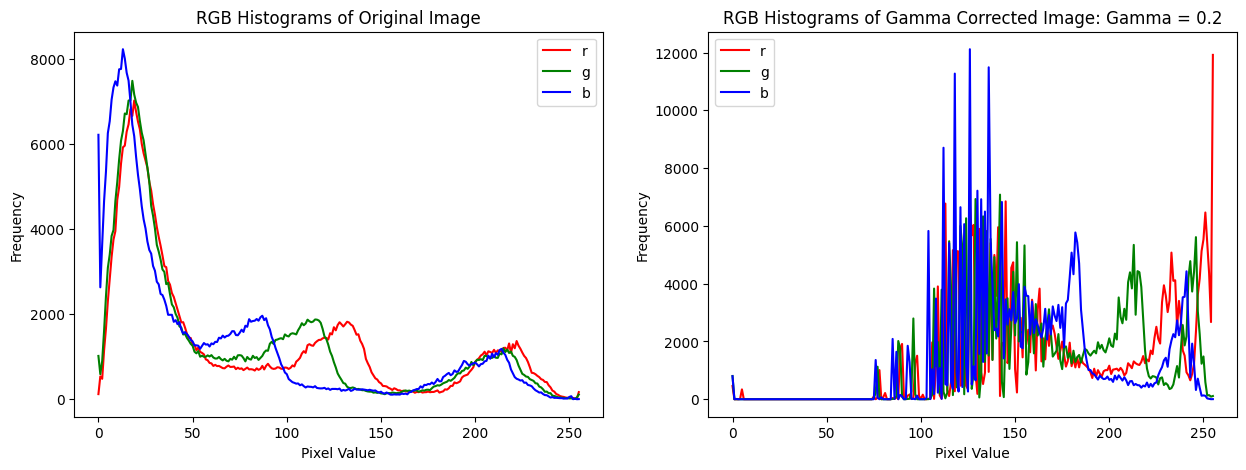

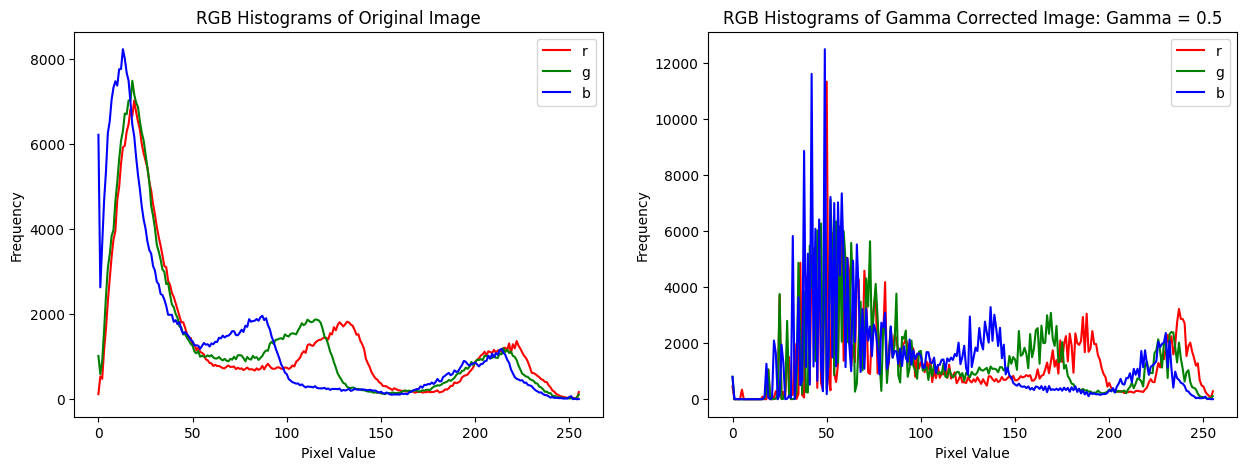

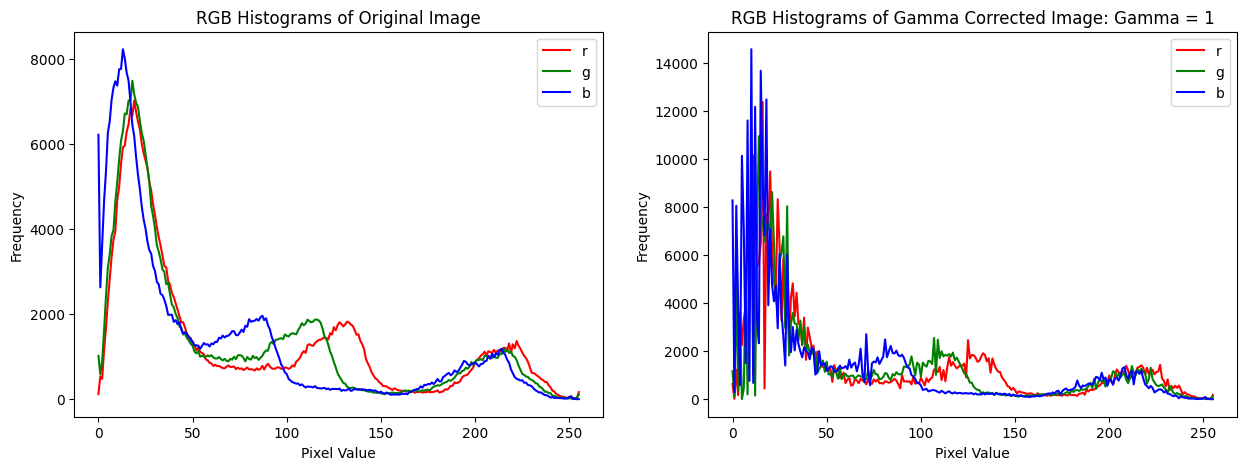

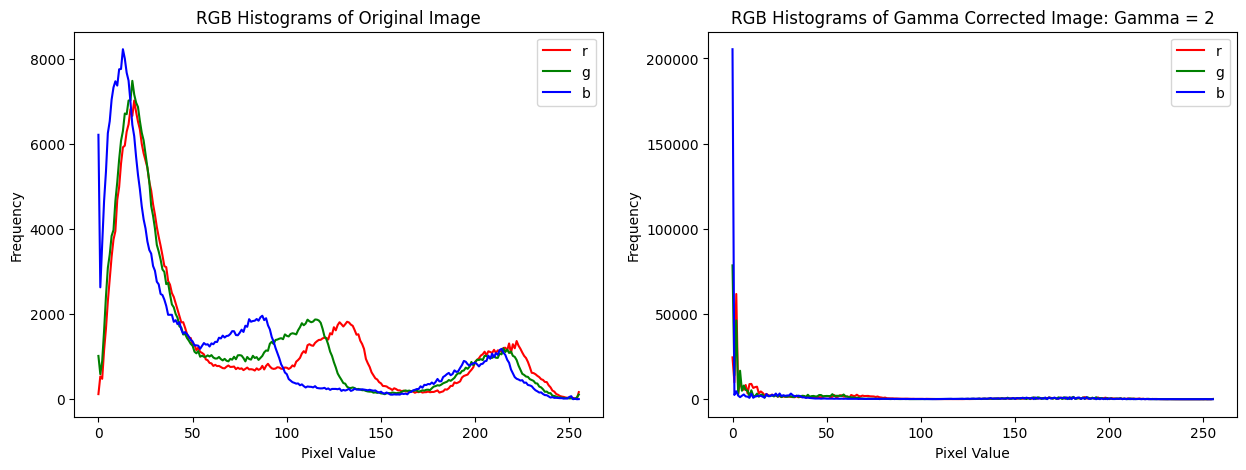

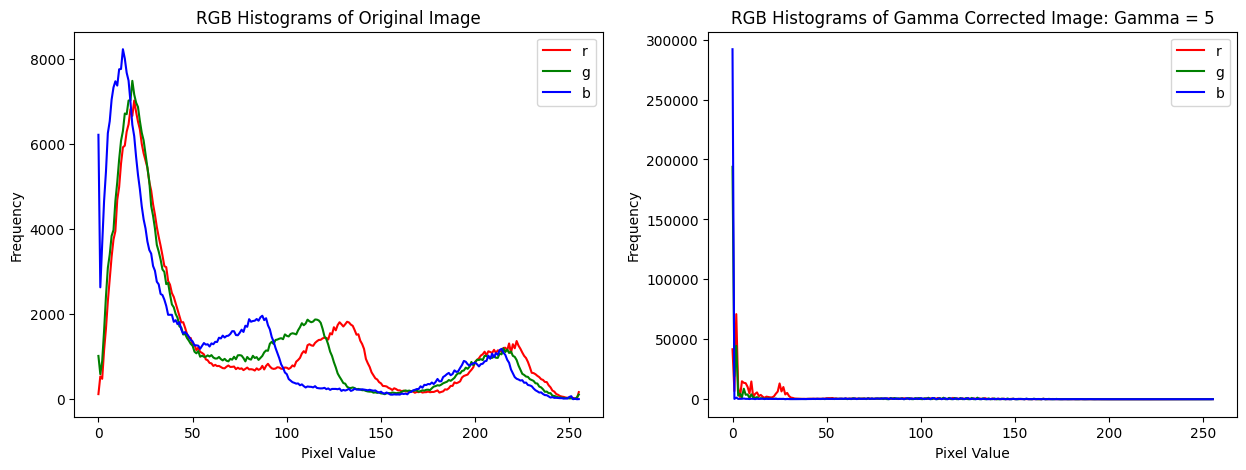

In [19]:
   # Plot the histograms of the original and corrected images.
for g in gamma:
    table=np.array([(i/255.0)**(g)*255.0 for i in np.arange(0,256)]).astype('uint8')
    L_gamma=cv.LUT(L_axis,table)

    img_Lab_corrected = cv.merge((L_gamma, a_axis, b_axis))

    img_corrected = cv.cvtColor(img_Lab_corrected, cv.COLOR_LAB2RGB)
    f,axarr=plt.subplots(1,2, figsize=(15,5))
    color=('r','g','b')
    for i,c in enumerate(color):
        hist_orig=cv.calcHist([img_orig],[i],None,[256],[0,256])
        axarr[0].plot(hist_orig,color=c,label=c)
        hist_corrected=cv.calcHist([img_corrected],[i],None,[256],[0,256])
        axarr[1].plot(hist_corrected,color=c,label=c)

    axarr[0].set_title('RGB Histograms of Original Image')
    axarr[0].set_xlabel('Pixel Value')
    axarr[0].set_ylabel('Frequency')
    axarr[0].legend()

    axarr[1].set_title('RGB Histograms of Gamma Corrected Image: Gamma = {}'.format(g))
    axarr[1].set_xlabel('Pixel Value')
    axarr[1].set_ylabel('Frequency')
    axarr[1].legend()

    plt.show()

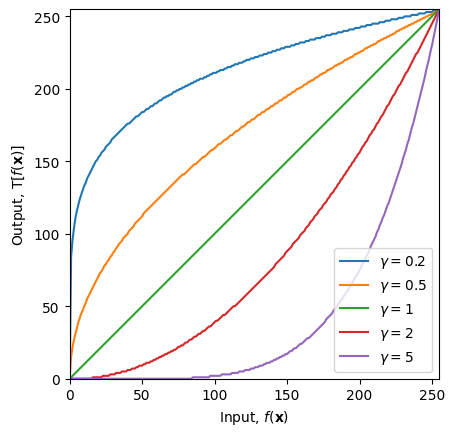

In [26]:
fig, ax = plt.subplots()

for g in gamma:
    table=np.array([(i/255.0)**(g)*255.0 for i in np.arange(0,256)]).astype('uint8')
    ax.plot(table, label=r'$\gamma = {g}$'.format(g=g))
ax.legend(loc='best')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
plt.savefig('transform.png')
plt.show()

When the gamma value is equal to 1, it results in an image identical to the original image. However, as the gamma value decreases below 1, it enhances the brightness of the image, making it appear lighter. Conversely, when the gamma value increases above 1, it intensifies the darkness of the original image, rendering it darker. This behavior is evident when observing the histograms; as the gamma correction is applied, the histogram of the image shifts towards the left, indicating an increase in darker intensity values due to the rising gamma value.

4. Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation such
as
f(x) = min(x + a*128*e**((−(x−128)**2)/(2*σ**2)), 255),
to the saturation plane, where x is the input intensity, a ∈ [0,1] and σ = 70.

(a) Split the image shown in Fig. 4 into hue, saturation, and value planes.

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('../images/spider.png', cv.IMREAD_COLOR)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

# Split the image into HSV channels
img_hsv = cv.cvtColor(img_orig, cv.COLOR_RGB2HSV)
h, s, v = cv.split(img_hsv)

(b) Apply the aforementioned intensity transformation to the saturation plane.

In [36]:
# Define the intensity transformation function
def intensity_transformation_table(a, sigma=70):
    x = np.arange(256)
    transform = (np.minimum(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)).astype(np.uint8)
    return transform

(c) Adjust a to get a visually pleasing output. Report the value of a.

In [56]:
# Adjust this value for visually pleasing output
a = 0.9
print(a) 
table = intensity_transformation_table(a)
transformed_s = cv.LUT(s, table)

0.9


(d) Recombine the three planes.

In [57]:
# Recombine the planes
vibrance_hsv_img = cv.merge([h, transformed_s, v])
vibrance_rgb_img = cv.cvtColor(vibrance_hsv_img, cv.COLOR_HSV2RGB)

(e) Display the original image, vibrance-enhanced image, and the intensity transformation.

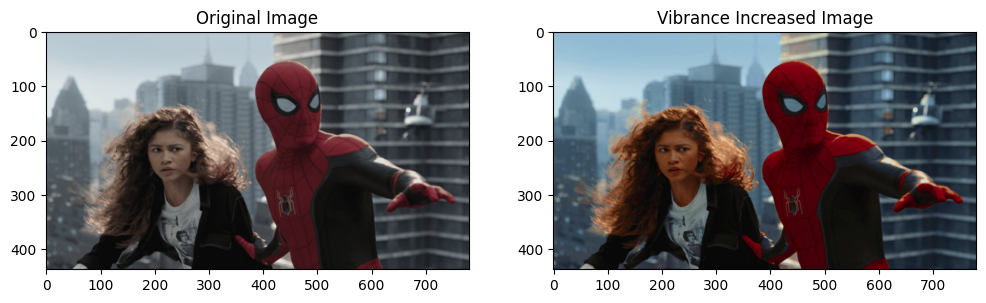

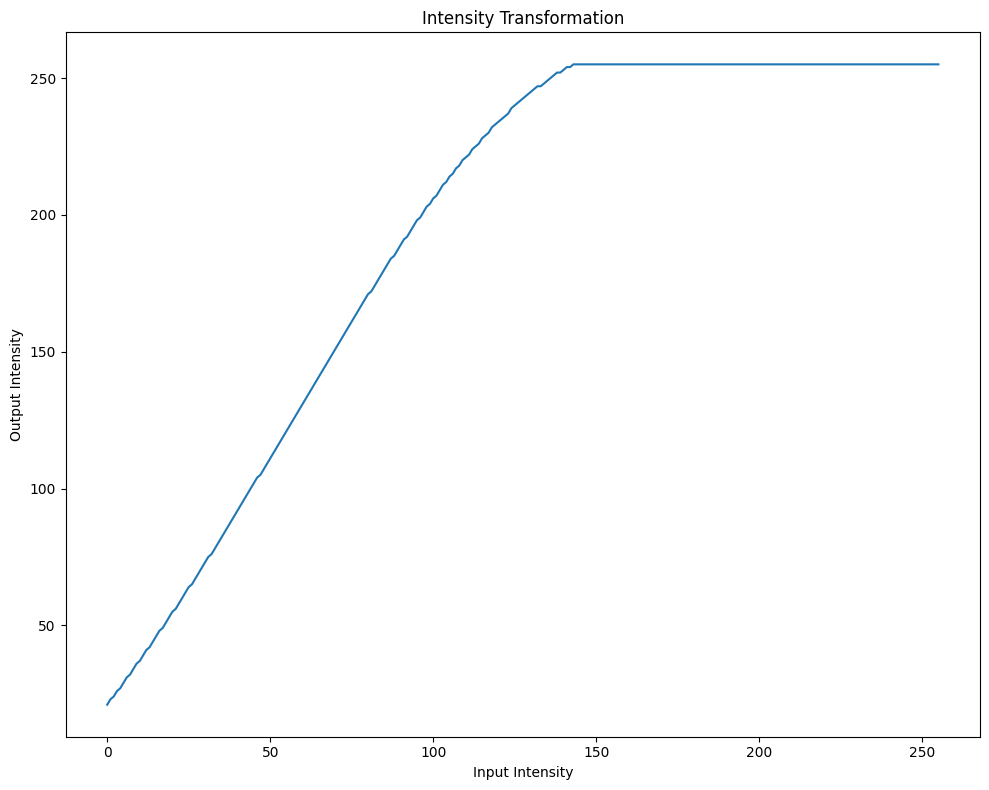

In [58]:
# Display original image, vibrance-enhanced image, and the intensity transformation
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
plt.imshow(img_orig)
plt.title("Original Image")
plt.axis()

plt.subplot(1,2,2)
plt.imshow(vibrance_rgb_img)
plt.title("Vibrance Increased Image")
plt.axis()

plt.figure(figsize=(10, 8))

plt.subplot()
x = np.arange(256)
y = intensity_transformation_table(a)
plt.plot(x, y)
plt.title("Intensity Transformation")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")

plt.tight_layout()
plt.show()

As value of a increases from 0 to 1, the RGB color intensities in the output image progressively become brighter and more colorful, following the above specified function.

5. Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the histograms before and after equalization. 

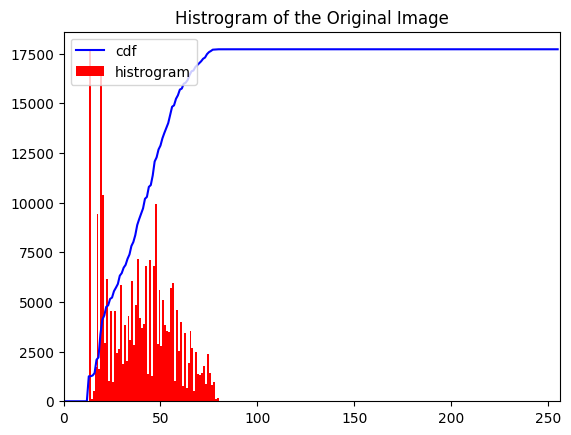

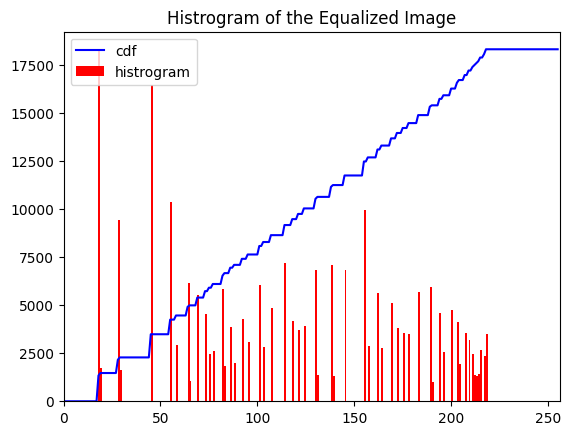

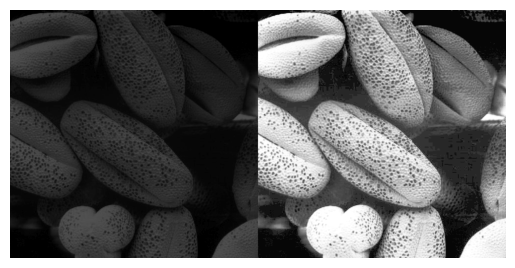

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
# Histogram equalization by OpenCV
def histogram_equalization0(img):
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    cdf=hist.cumsum()
    divisor = cdf.max()
    Transformed_cdf = [((256-1)*x) / divisor for x in cdf]
    Equalized_histrogram = [round(x) for x in Transformed_cdf]
    Equalized_histrogram=np.array(Equalized_histrogram)
    Equalized_img = cv.LUT(img, Equalized_histrogram.astype('uint8'))
    return Equalized_img

# Histogram equalization by iterations
def histogram_equalization(img):
    no_rows = img.shape[0]
    no_cols = img.shape[1]
    hist_orig = np.zeros((256,), dtype=np.uint16)
    hist_equalized = np.zeros((256,), dtype=np.uint16)
    result_img=img
    for i in range(no_rows):
       for j in range(no_cols):
         intensity = result_img[i,j]
         hist_orig[intensity] += 1
    for i in range(256):
       for j in range(i+1):
          hist_equalized[i] += hist_orig[j]*(255/(no_rows*no_cols))
    hist_equalized = [round(x) for x in hist_equalized]
    
    hist_equalized = (np.array(hist_equalized)).astype(np.uint16)
    for i in range(no_rows):
       for j in range(no_cols):
          intensity = result_img[i,j]
          img[i,j] = hist_equalized[intensity]
    return result_img



img=cv.imread('../images/shells.tif', cv.IMREAD_GRAYSCALE)
hist,bins=np.histogram(img.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histrogram'),loc='upper left')
plt.title('Histrogram of the Original Image')
plt.show()
equ=histogram_equalization(img)
hist,bins=np.histogram(equ.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized,color='b')
plt.hist(equ.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histrogram'),loc='upper left')
plt.title('Histrogram of the Equalized Image')
plt.show()
img=cv.imread('../images/shells.tif', cv.IMREAD_GRAYSCALE)
res=np.hstack((img,equ))
plt.axis('off')
plt.imshow(res,cmap='gray')


In the original image, dark shades are abundant, while bright intensities are entirely absent. However, after applying histogram equalization, the resulting image encompasses a much broader spectrum of intensity levels. Essentially, histogram equalization extends the originally limited intensity range to cover a wider array of intensities, making the image richer in terms of available shades and details. Therefore the output image is more than the original image.

6. In this question, we will apply histogram equalization only to the foreground of an image to produce an
image with a histogram equalized foreground.

(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.

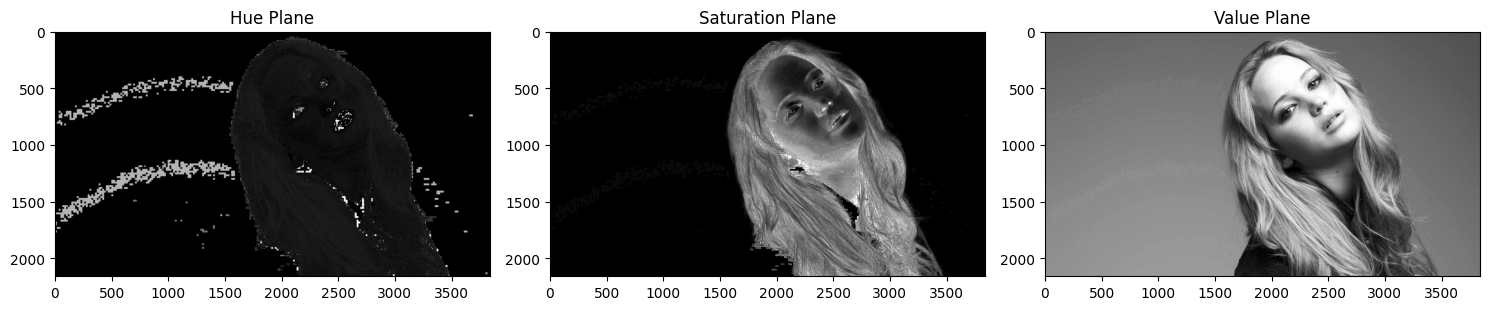

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('../images/jeniffer.jpg')

# Split the image into hue, saturation, and value planes
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
hue_plane, saturation_plane, value_plane = cv.split(hsv_image)

# Display the hue, saturation, and value planes
plt.figure(figsize=(15, 10))

plt.subplot(1,3,1)
plt.imshow(hue_plane, cmap='gray')
plt.title('Hue Plane')

plt.subplot(1,3,2)
plt.imshow(saturation_plane, cmap='gray')
plt.title('Saturation Plane')

plt.subplot(1,3,3)
plt.imshow(value_plane, cmap='gray')
plt.title('Value Plane')

plt.tight_layout()
plt.show()

(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.

In [23]:
# Select the appropriate plane to threshold and extract the foreground mask
# Use the saturation plane for thresholding
_, foreground_mask = cv.threshold(saturation_plane, 100, 255, cv.THRESH_BINARY)

(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram

In [24]:
# Obtain the foreground only and compute the histogram
foreground = cv.bitwise_and(value_plane, foreground_mask)
hist_foreground = cv.calcHist([foreground], [0], None, [256], [0, 256])

(d) Obtain the cumulative sum of the histogram using np.cumsum.

In [25]:
# Compute the cumulative sum of the histogram
cdf = np.cumsum(hist_foreground)

(e) Use the formulas in slides to histogram-equalize the foreground.

In [26]:
# Histogram equalization for the foreground
divisor = cdf.max()
Transformed_cdf = [((256-1)*x) / divisor for x in cdf]
Equalized_foreground = [round(x) for x in Transformed_cdf]
Equalized_foreground=np.array(Equalized_foreground)

Extracted_Equalized_foreground = cv.LUT(foreground, Equalized_foreground.astype('uint8'))

(f) Extract the background and add with the histogram equalized foreground.

In [27]:
equalized_value_plane = cv.merge((hue_plane, saturation_plane, Extracted_Equalized_foreground))
equalized_image = cv.cvtColor(equalized_value_plane, cv.COLOR_HSV2BGR)

Show the hue, saturation, and value plane, the mask, the original image, and the result with the histogramequalized foreground.

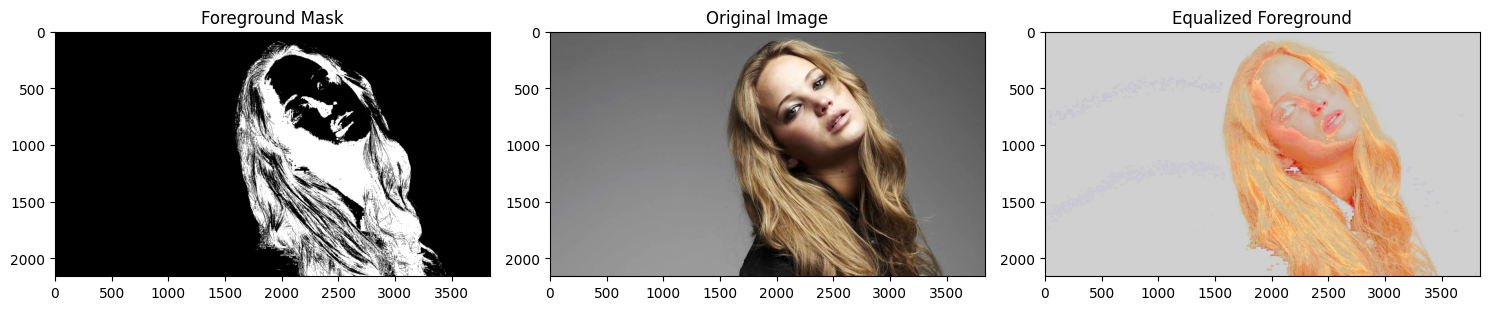

In [28]:
plt.figure(figsize=(15, 10))

plt.subplot(1,3,1)
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Mask')

plt.subplot(1,3,2)
plt.imshow(image[..., ::-1])
plt.title('Original Image')

plt.subplot(1,3,3)
plt.imshow(equalized_image[..., ::-1])
plt.title('Equalized Foreground')

plt.tight_layout()
plt.show()

The Foreground Mask shows what parts of the picture we want to make better, like objects or shapes. The Original Image is how things look at first. When we compare it with the mask and the Equalized Foreground Image, we see how much better it got with histogram equalization. This helps us understand how specific parts of the picture improved in clarity and brightness. The mask guides the improvement, the original picture is our starting point, and the equalized picture shows the actual enhancements made.

7. Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 7
(a) Using the existing filter2D to Sobel filter the image.
(b) Write your own code to Sobel filter the image.
(c) Using the property

(1 0 −1    1
 2 0 −2 = (2) * (1 0 -1)
 1 0 −1)   1
, carry out Sobel filtering.

(a) Using the existing filter2D to Sobel filter the image.

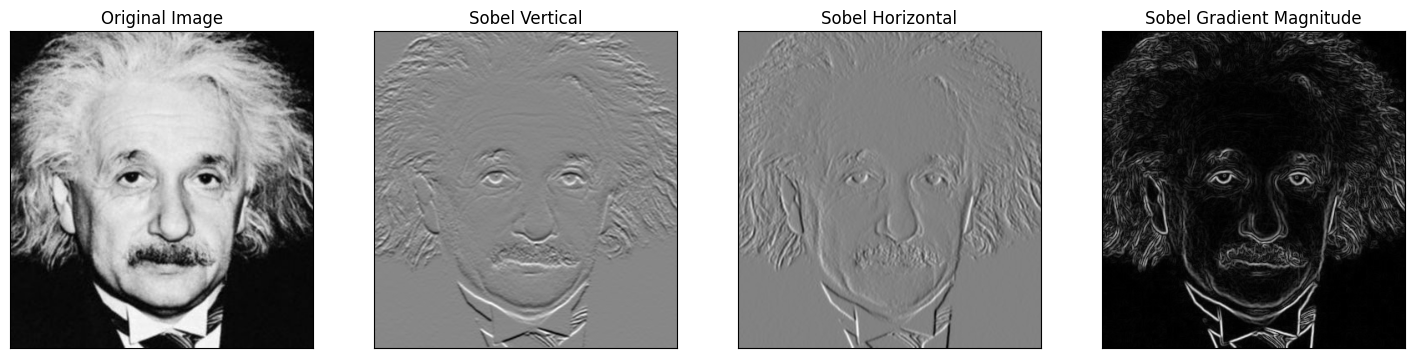

In [3]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

# Sobel Vertical
Sobel_V = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
Sobel_V_img = cv.filter2D(img,-1,Sobel_V)

# Sobel Horizontal
Sobel_H = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
Sobel_H_img = cv.filter2D(img,-1,Sobel_H)

# Sobel Gradient Magnitude
Grad_mag_img = np.sqrt(Sobel_V_img**2+Sobel_H_img**2)

fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(Sobel_V_img, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(Sobel_H_img, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].set_xticks([]), axes[2].set_yticks([])
axes[3].imshow(Grad_mag_img, cmap='gray')
axes[3].set_title('Sobel Gradient Magnitude')
axes[3].set_xticks([]), axes[3].set_yticks([])
plt.show()

(b) Write your own code to Sobel filter the image.

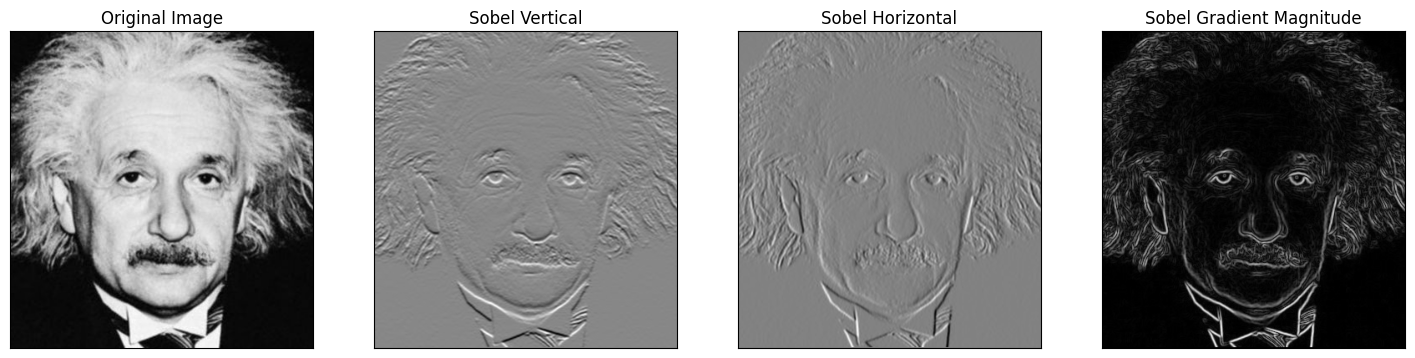

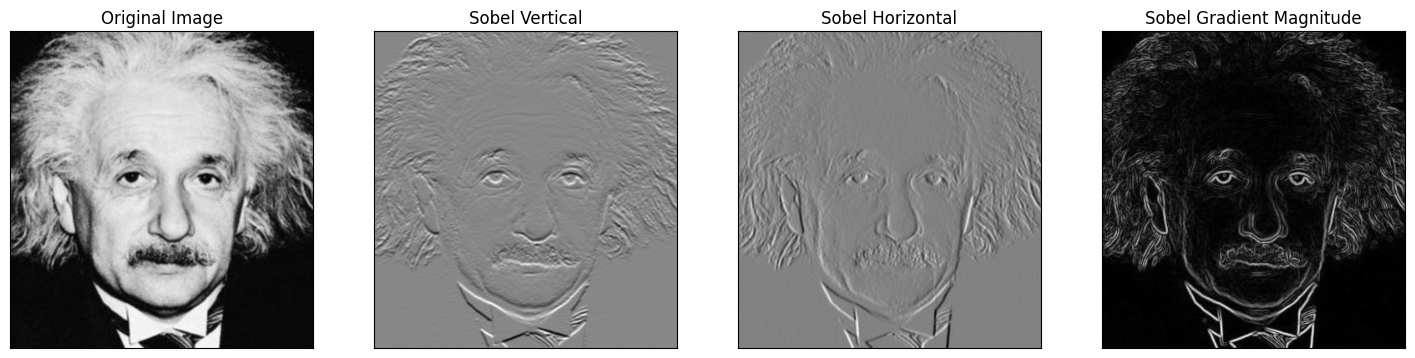

In [38]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math

# Sobel Filter by iterations.
def Sobel_Filter(img):
    Sobel_H = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Sobel_V = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    k_hh, k_hw = math.floor(Sobel_H.shape[0]/2), math.floor(Sobel_H.shape[1]/2)
    h, w = img.shape
    Sobel_H_img = np.zeros(img.shape, 'float')
    Sobel_V_img = np.zeros(img.shape, 'float')

    for x in range(k_hh, h - k_hh):
        for y in range(k_hw, w - k_hw):
            sum_H = 0
            sum_V = 0
            for i in range(Sobel_H.shape[0]):
                for j in range(Sobel_H.shape[1]):
                    sum_H += img[x - k_hh + i, y - k_hw + j] * Sobel_H[i, j]
                    sum_V += img[x - k_hh + i, y - k_hw + j] * Sobel_V[i, j]
            Sobel_H_img[x, y] = sum_H
            Sobel_V_img[x, y] = sum_V
  
    Sobel_H_img1 = Sobel_H_img * 255.0 / np.max(Sobel_H_img)  # Normalize to [0, 255]
    Sobel_H_img1 = Sobel_H_img1.astype(np.uint8)

    Sobel_V_img1 = Sobel_V_img * 255.0 / np.max(Sobel_V_img)  # Normalize to [0, 255]
    Sobel_V_img1 = Sobel_V_img1.astype(np.uint8)

    Grad_mag_img = np.sqrt(Sobel_H_img**2 + Sobel_V_img**2)
    Grad_mag_img = Grad_mag_img * 255.0 / np.max(Grad_mag_img)  # Normalize to [0, 255]
    Grad_mag_img = Grad_mag_img.astype(np.uint8)
    
    return Sobel_H_img,Sobel_V_img,Grad_mag_img


img = cv.imread('../images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)


Sobel_H_img,Sobel_V_img,Grad_mag_img = Sobel_Filter(img)

fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(Sobel_V_img, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(Sobel_H_img, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].set_xticks([]), axes[2].set_yticks([])
axes[3].imshow(Grad_mag_img, cmap='gray')
axes[3].set_title('Sobel Gradient Magnitude')
axes[3].set_xticks([]), axes[3].set_yticks([])
plt.show()

# Sobel Filter by OpenCV
Sobel_H_img = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
Sobel_V_img = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
Grad_mag_img = np.sqrt(Sobel_H_img**2+Sobel_V_img**2)

fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(Sobel_V_img, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(Sobel_H_img, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].set_xticks([]), axes[2].set_yticks([])
axes[3].imshow(Grad_mag_img, cmap='gray')
axes[3].set_title('Sobel Gradient Magnitude')
axes[3].set_xticks([]), axes[3].set_yticks([])
plt.show()



(c) Using the property

(1 0 −1    1
 2 0 −2 = (2) * (1 0 -1)
 1 0 −1)   1
, carry out Sobel filtering.

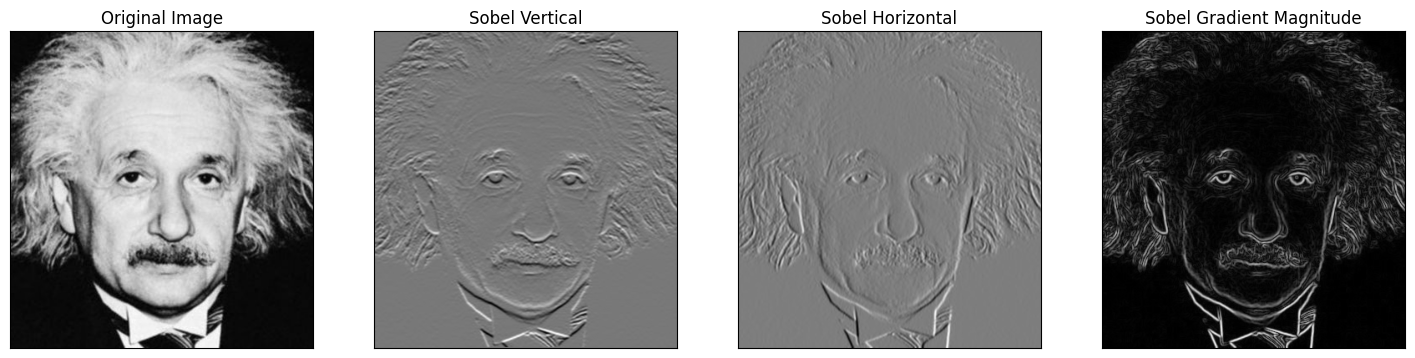

In [40]:
Sobel_H_kernel = np.array([1,2,1], dtype=np.float32)
Sobel_V_kernel = np.array([1,0,-1], dtype=np.float32)
Sobel_V_img = cv.sepFilter2D(img, -1, Sobel_H_kernel, Sobel_V_kernel)
Sobel_H_img = cv.sepFilter2D(img, -1, Sobel_V_kernel, Sobel_H_kernel)
Grad_mag_img = np.sqrt(Sobel_H_img**2+Sobel_V_img**2)

fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(Sobel_V_img, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(Sobel_H_img, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].set_xticks([]), axes[2].set_yticks([])
axes[3].imshow(Grad_mag_img, cmap='gray')
axes[3].set_title('Sobel Gradient Magnitude')
axes[3].set_xticks([]), axes[3].set_yticks([])
plt.show()


Using three different methods to apply Sobel filtering on the image, we noticed that there's very little difference in the resulting Sobel vertical and horizontal images. All three methods produced almost the same output. This suggests that, in this context, the choice of filtering method doesn't significantly affect the detection of vertical and horizontal edges. It indicates that the edge detection process is quite stable and consistent, regardless of which specific method is employed.

8. Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image,
which can handle
(a) nearest-neighbor, and
(b) bilinear interpolation.
3
I have included four images, two large originals, and there zoomed-out versions. Test you algorithm by
computing the normalized sum of squared difference (SSD) when you scale-up the given small images by a
factor of 4 by comparing with the original images. 

SSD of Nearest Neighbour method: 259.01889708719136
SSD of Bilinear method: 258.6383998842593


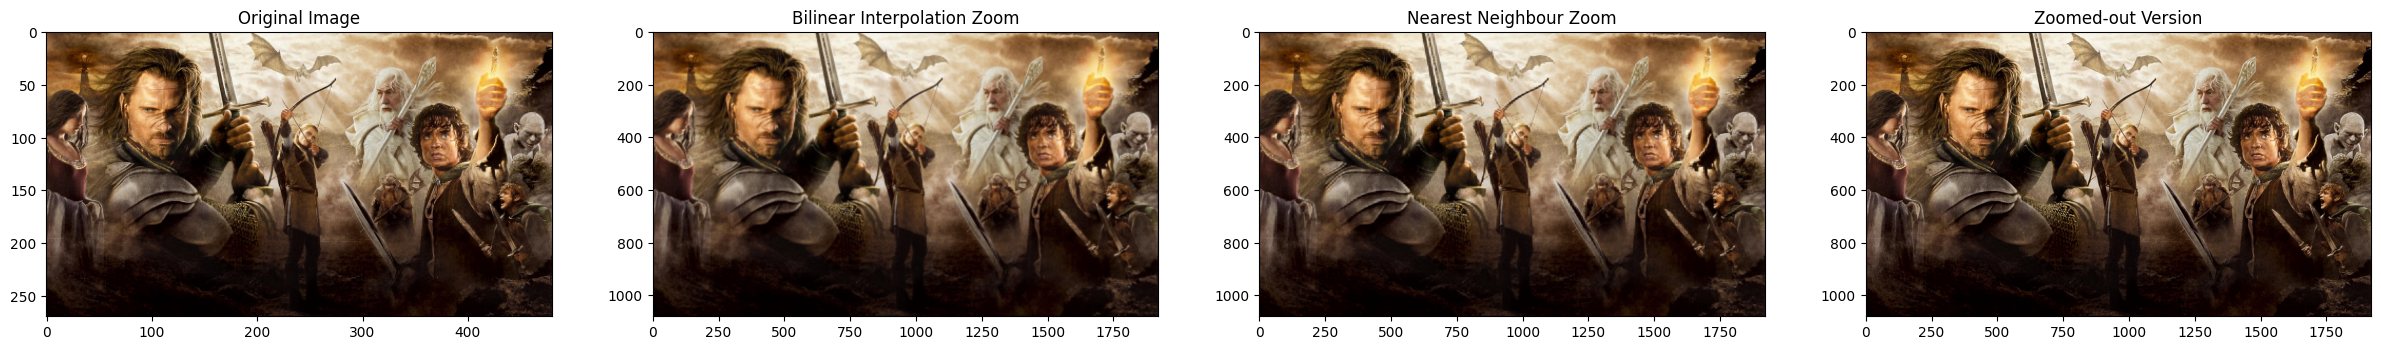

In [64]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Nearest Neighbour
def Nearest_Neighbour_zoom(input_image, zoom_factor):
    zoomed_image = np.zeros((int(input_image.shape[0] * zoom_factor), int(input_image.shape[1] * zoom_factor), 3), dtype=input_image.dtype)
    for i in range(zoomed_image.shape[0]):
        for j in range(zoomed_image.shape[1]):
            x = int(round(i / zoom_factor, 0))
            y = int(round(j / zoom_factor, 0))
            if x >= input_image.shape[0]:
                x = input_image.shape[0] - 1
            if y >= input_image.shape[1]:
                y = input_image.shape[1] - 1
            zoomed_image[i, j] = input_image[x, y]
    return zoomed_image

# Bilinear Interpolation
def Bilinear_Interpolation_zoom(input_image, zoom_factor):
    zoomed_image = np.zeros((int(input_image.shape[0] * zoom_factor), int(input_image.shape[1] * zoom_factor), 3), dtype=input_image.dtype)
    for i in range(zoomed_image.shape[0]):
        for j in range(zoomed_image.shape[1]):
            x = i / zoom_factor
            y = j / zoom_factor
            x1 = int(x)
            y1 = int(y)
            x2 = int(x) + 1
            y2 = int(y) + 1
            if x1 >= input_image.shape[0]:
                x1 = input_image.shape[0] - 1
            if x2 >= input_image.shape[0]:
                x2 = input_image.shape[0] - 1
            if y1 >= input_image.shape[1]:
                y1 = input_image.shape[1] - 1
            if y2 >= input_image.shape[1]:
                y2 = input_image.shape[1] - 1
            val1 = input_image[x1, y1] * abs(y - y2) + input_image[x1, y2] * abs(y - y1)
            val2 = input_image[x2, y1] * abs(y - y2) + input_image[x2, y2] * abs(y - y1)
            val3 = val1 * abs(x - x2) + val2 * abs(x - x1)
            for k in range(3):
                val3[k] = int(round(val3[k], 0))
            zoomed_image[i, j] = val3
    return zoomed_image

image = cv.imread('../images/im01small.png')
CvtImg = cv.cvtColor(image, cv.COLOR_BGR2RGB)

zoom_factor = 4
zoomed_Bilinear = Bilinear_Interpolation_zoom(image, zoom_factor)
zoomed_Nearest = Nearest_Neighbour_zoom(image, zoom_factor)

fig, ax = plt.subplots(1, 4, figsize=(30, 30))
ax[0].imshow(CvtImg)
ax[0].set_title('Original Image')

Img_Bilinear = cv.cvtColor(zoomed_Bilinear, cv.COLOR_BGR2RGB)
ax[1].imshow(Img_Bilinear)
ax[1].set_title('Bilinear Interpolation Zoom')

Img_Nearest = cv.cvtColor(zoomed_Nearest, cv.COLOR_BGR2RGB)
ax[2].imshow(Img_Nearest)
ax[2].set_title('Nearest Neighbour Zoom')



img_orig = cv.imread('../images/im01.png')
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
ax[3].imshow(img_orig)
ax[3].set_title('Zoomed-out Version')
ssd_nearest = np.sum((img_orig - zoomed_Nearest)**2) / (img_orig.shape[0] * img_orig.shape[1])
print("SSD of Nearest Neighbour method:", ssd_nearest)
print("SSD of Bilinear method:", np.sum((img_orig - zoomed_Bilinear)**2) / (img_orig.shape[0] * img_orig.shape[1]))

plt.show()
 

Bilinear interpolation indeed provides a smoother image compared to the nearest neighbor method. However, it falls short when it comes to producing perfectly sharp transitions, such as edges, because it relies on a weighted average of the two adjacent pixels to zoom the image. This weighted averaging tends to blur the sharpness of transitions and fine details, resulting in a more gradual and smoother appearance.

9. Fig. 8 shows a flower image with both the foreground and background are in focus.

(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and
background image.

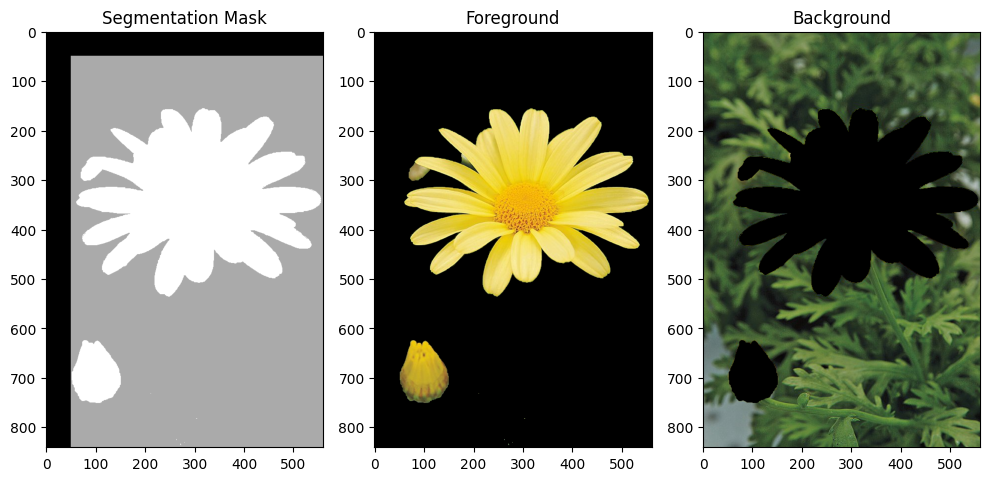

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('../images/daisy.jpg')

# Create a mask for the foreground and background using grabCut
mask = np.zeros(img.shape[:2], np.uint8)
rect = (50, 50, img.shape[1]-50, img.shape[0]-50)  # Initial rectangle for grabCut
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)
cv.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask to separate foreground from background
mask1 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to create foreground and background images
foreground = img * mask1[:, :, np.newaxis]
background = img - foreground

# Display the final segmentation mask, foreground, and background
plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.imshow(mask, cmap='gray')
plt.title('Segmentation Mask')

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.title('Background')

plt.tight_layout()
plt.show()


(b) Produce an enhanced image with a substantially blurred background. Display the original image
alongside the enhanced image.

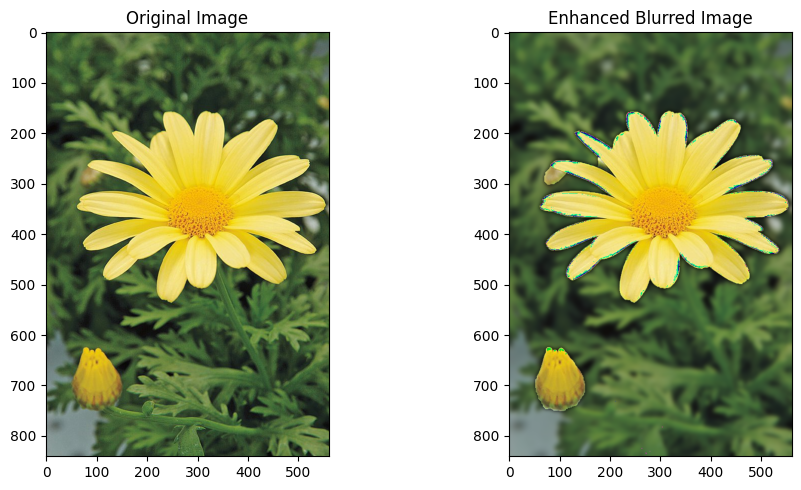

In [31]:
# Blurring the background and combining with the foreground
blurred_background = cv.GaussianBlur(background, (25, 25), 0)
blurred_img = foreground + blurred_background

# Display the original image and the enhanced image
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB))
plt.title('Enhanced Blurred Image')

plt.tight_layout()
plt.show()

(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?

The background just beyond the edge of the flower appears quite dark in the enhanced image because when the foreground and background images are combined, the dark (black) pixels from the foreground image accumulate with the background. This darkening effect occurs because the pixels in the foreground image that are meant to represent the flower's edges have a value of 0 in the mask (where the background is), and when added to the blurred background, they contribute to the overall darkness in that region. This is why the area just beyond the flower's edge appears dark in the enhanced image.